In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import os

In [2]:
# Base directory
base_dir = 'Plantvillage'

# Data augmentation and rescaling for the training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 80% training, 20% validation
)

# Only rescaling for the validation set
val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Training generator
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Validation generator
validation_generator = val_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 483 images belonging to 3 classes.
Found 120 images belonging to 3 classes.


In [3]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(3, activation='softmax')  # 3 classes: rice, tomato, potato
])

In [4]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [5]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=50  # You can adjust the number of epochs
)

Epoch 1/50
15/15 [==============================] - 35s 2s/step - loss: 1.1460 - accuracy: 0.4545 - val_loss: 0.8051 - val_accuracy: 0.7812
Epoch 2/50
15/15 [==============================] - 31s 2s/step - loss: 0.7323 - accuracy: 0.6896 - val_loss: 0.7414 - val_accuracy: 0.6667
Epoch 3/50
15/15 [==============================] - 32s 2s/step - loss: 0.5605 - accuracy: 0.7738 - val_loss: 0.3452 - val_accuracy: 0.8750
Epoch 4/50
15/15 [==============================] - 31s 2s/step - loss: 0.6976 - accuracy: 0.7339 - val_loss: 0.4649 - val_accuracy: 0.8021
Epoch 5/50
15/15 [==============================] - 32s 2s/step - loss: 0.3933 - accuracy: 0.8581 - val_loss: 0.2443 - val_accuracy: 0.8854
Epoch 6/50
15/15 [==============================] - 30s 2s/step - loss: 0.2455 - accuracy: 0.9002 - val_loss: 0.3382 - val_accuracy: 0.9062
Epoch 7/50
15/15 [==============================] - 31s 2s/step - loss: 0.2333 - accuracy: 0.9224 - val_loss: 0.1759 - val_accuracy: 0.9583
Epoch 8/50
15/15 [==

In [6]:
# Extracting accuracy and loss from the history object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)


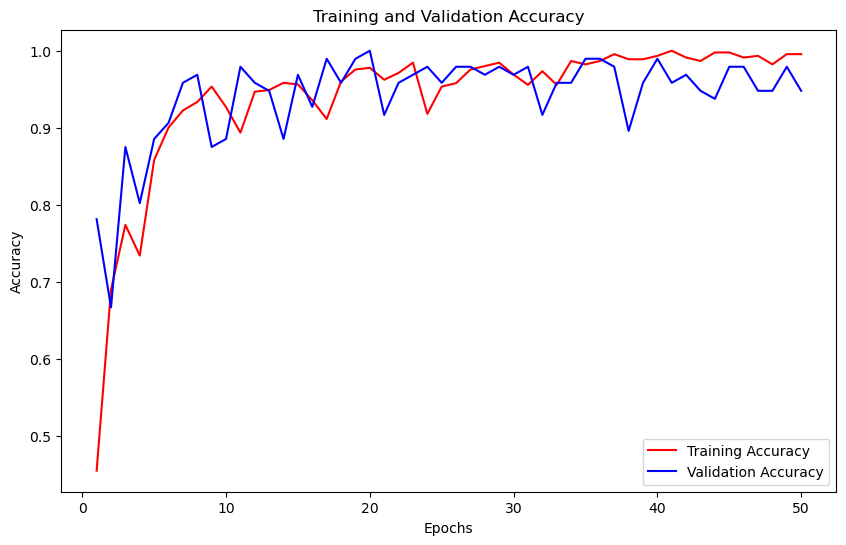

In [7]:
plt.figure(figsize=(10, 6))

plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

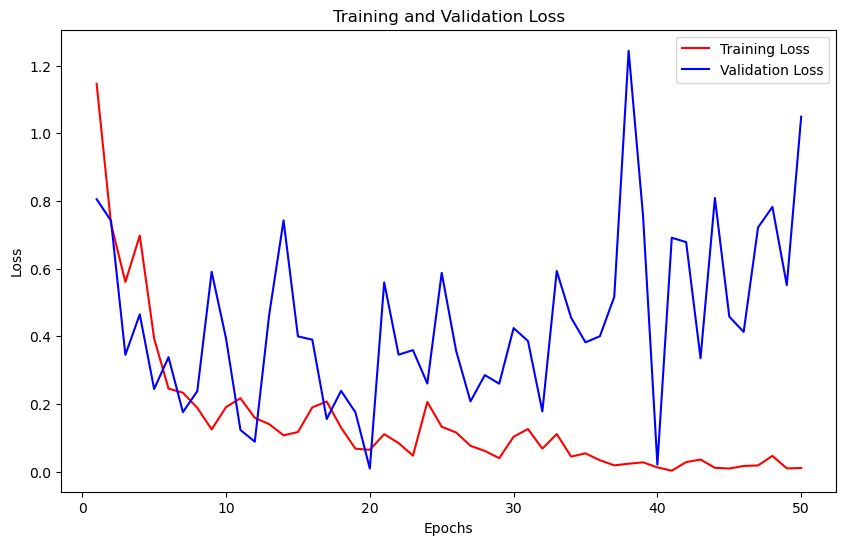

In [11]:
# Plot Training and Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

1/1 [==============================] - 0s 26ms/step


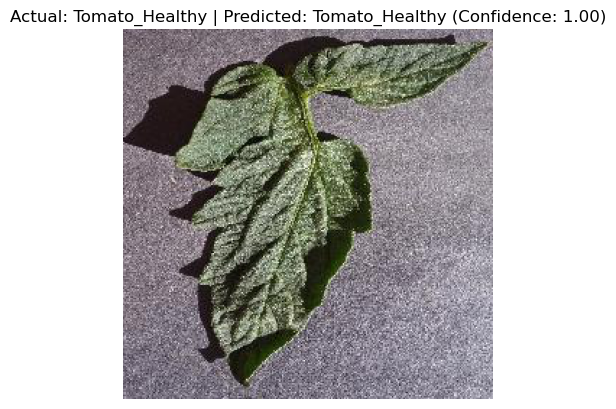

In [27]:
import os
import random
import numpy as np
from tensorflow.keras.preprocessing import image
from PIL import Image
import matplotlib.pyplot as plt

def predict_random_image(model, base_dir='Plantvillage'):
    # Define the class names based on the subfolder names
    class_names = ['Potato_Healthy', 'Rice_Healthy', 'Tomato_Healthy']
    
    # Randomly select a class folder
    selected_class = random.choice(class_names)
    
    # Get the path to the selected class folder
    class_folder = os.path.join(base_dir, selected_class.lower())
    
    # Randomly select an image from the selected class folder
    image_filename = random.choice(os.listdir(class_folder))
    image_path = os.path.join(class_folder, image_filename)
    
    # Load and preprocess the image
    img = Image.open(image_path)
    img_resized = img.resize((150, 150))
    img_array = image.img_to_array(img_resized)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize the image
    
    # Run the prediction
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions[0])
    predicted_class = class_names[predicted_class_index]
    confidence = np.max(predictions[0])
    
    # Display the image with the actual label, predicted label, and confidence
    plt.imshow(img)
    plt.title(f"Actual: {selected_class} | Predicted: {predicted_class} (Confidence: {confidence:.2f})")
    plt.axis('off')
    plt.show()

# Run the prediction
predict_random_image(model)

In [24]:
# Save the model to a file
model.save('plantvillage_classifier.h5')

Found 120 images belonging to 3 classes.
4/4 [==============================] - 2s 593ms/step


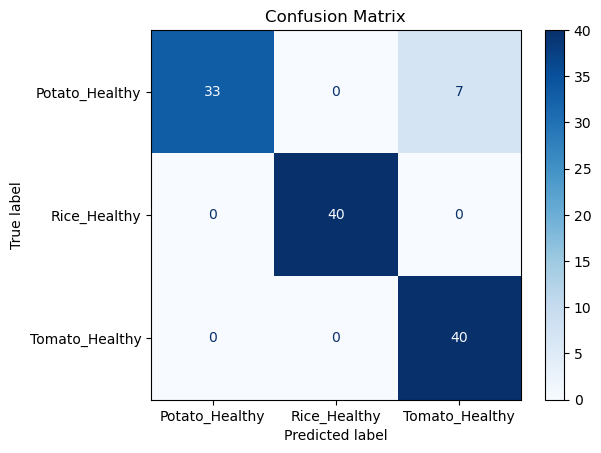

In [25]:
# Get true labels and predictions
val_generator = val_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

# Predict on validation set
predictions = model.predict(val_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = val_generator.classes
class_labels = list(val_generator.class_indices.keys())

# Generate confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)

# Plot confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()